# Robot Learning
## Project

2025
TAs: Andrea Protopapa (andrea.protopapa@polito.it), Davide Buoso (davide.buoso@polito.it)

# 0. Introduction
The main goal of this project is to get familiar with the problem of learning a control policy for a robot in simulation using state-of-the-art reinforcement learning algorithms while introducing the challenges of using that policy in the real world. In particular, the student will learn about the sim-to-real transfer problem in robot learning literature, namely the task of learning policies in simulation through RL that can be directly transferred to real-world hardware, avoiding costly interactions with real setups and speeding up the training time. During this project, the student will be simulating the sim-to-real transfer task in a sim-to-sim scenario, where a discrepancy between source (training) and target (test) domains is manually injected. The student will implement domain randomization of dynamics parameters (e.g. masses, friction coefficients), a popular strategy to learn robust policies that transfer well to the target domain.

Specifically, the student must reach the following goals by the end of the project:
1. Read the provided material to get familiar with the Reinforcement Learning framework, the sim-to-real transfer challenge and the common techniques to perform an efficient transfer from simulation to reality;
2. Implement an RL training pipeline via third-party APIs to state-of-the-art reinforcement learning algorithms such as PPO and SAC.
3. Implement Uniform Domain Randomization (UDR) to learn robust policies in the source domain and limit the loss of performance during the sim-to-real transfer;
4. Propose and implement a novel extension of the project (**FINAL EXAM ASSIGNMENT**);


**The project is divided in two different parts, with two different submissions. Please refer to the official assignment at [Google Doc](https://docs.google.com/document/d/1XWE2NB-keFvF-EDT_5muoY8gdtZYwJIeo48IMsnr9l0/edit?usp=sharing) for the official instructions.**


# 1. Preliminaries

Before starting, you’re asked to take some time to familiarize yourself with the framework of Reinforcement Learning, the sim-to-real transfer challenge and SOTA strategies to overcome it. More in detail:

- Read sections 1.-1.4, 1.6, 3.-3.8, of [1] to understand the general Reinforcement Learning framework;
- Watch introductory video on Reinforcement learning by DeepMind [video](https://youtu.be/2pWv7GOvuf0)
- Read [article](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html) on introduction to Reinforcement learning by OpenAI  [part 1, part 2, part 3]
- Read sections 1.-1.3, 3.-3.4, of [2]
- Read sections 1., 2., 3. of [3]
- Read debate on the sim-to-real transfer paradigm [4]
- Read [5], [6], [blog post](https://openai.com/blog/generalizing-from-simulation/) to understand domain randomization for sim-to-real transfer
- Read this [set of slides](http://josh-tobin.com/assets/pdf/randomization_and_the_reality_gap.pdf) by Josh Tobin and this [article](https://lilianweng.github.io/posts/2019-05-05-domain-randomization/) regarding domain randomization for both vision and dynamics properties

# 2. Implement lower/upper bound baselines
Train an RL agent on the gym [Hopper](https://www.gymlibrary.dev/environments/mujoco/hopper/) environment. This environment comes with an easy-to-use python interface which controls the underlying physics engine — [MuJoCo](https://mujoco.org/) — to model the robot.
The hopper is a one-legged robot model whose task is to learn how to jump without falling, while achieving the highest possible horizontal speed.

The student will simulate the sim-to-real transfer scenario in a simplified sim-to-sim setting, as no work takes place on an actual real robot. In particular, two custom domains have been created ad-hoc: policy training takes place in the source environment and the student will transfer and test the policy on the target environment — which technically represents the real world. To simulate the reality gap, the source domain Hopper has been generated by shifting the torso mass by 1kg with respect to the target domain.


## 2.1. Hopper environment
Check out the provided first code template and start playing around with the underlying Hopper environment. Get familiar with the test_random_policy.py script, the python interface for MuJoCo, the [Gymnasium documentation](https://gymnasium.farama.org), and the hopper environment overall. Finally answer the questions below.

### Question 1.1
What is the state space in the Hopper environment? Is it discrete or continuous?


#### Answer 1.1:
The state space is continuous and represents the physical state of the robot (positions + velocities), but excludes the absolute position in order to guarantee that the policy is invariant to translations.

### Question 1.2
What is the action space in the Hopper environment? Is it discrete or continuous?


#### Answer 1.2:
The action space is continuous and is composed by 3 real values which represent the torque to apply on the 3 joints of the robot with values in the range [-1, 1].

### Question 1.3
What is the mass value of each link of the Hopper environment, in the source and target variants respectively?


#### Answer 1.3:
In the training phase, the torso of the robot is 1kg lighter than in the real robot. Executing the test_random_policy.py script, we can see that the torso mass is 2.665kg: in other words, the real robot is 1kg heavier than the one in the training phase (3.665kg). 

**Hint:** If you need any help answering the above questions try looking at the [Mujoco documentation](https://mujoco.readthedocs.io/en/latest/overview.html) or the [Gymnasium documentation](https://gymnasium.farama.org).

A few other hints:
- Bodies defined in the environment: env.unwrapped.model.body(i).name
- Mass of all the corresponding bodies: env.unwrapped.model.body_mass
- Number of degrees of freedom (DoFs) of the robot: env.unwrapped.model.nv
- Number of DoFs for each body: env.unwrapped.model.body_dofnum
- Number of actuators: env.unwrapped.model.nu
- See other attributes [here](https://mujoco.readthedocs.io/en/latest/APIreference.html#mjmodel)

## 2.2. Implement the RL training pipeline
Implement a reinforcement learning pipeline to train a simple control policy for the Hopper environment. To this end, you’ll make use of a third-party library to train an agent with state-of-the-art reinforcement learning algorithms such as PPO and SAC. In particular, follow the steps below, and make sure to go through the provided external resources:

1. Create a script using the third-party library [stable-baselines3](https://github.com/DLR-RM/stable-baselines3) (sb3) and train the Hopper agent with one algorithm of choice between PPO [8] and SAC [7].
    - [openAI article on PPO](https://spinningup.openai.com/en/latest/algorithms/ppo.html)
    - [openAI article on SAC](https://spinningup.openai.com/en/latest/algorithms/sac.html)
    - Explanation [video](https://www.youtube.com/watch?v=5P7I-xPq8u8) on PPO, explanation [video](https://www.youtube.com/watch?v=pg-lKy7JIRk&t=10s) on SAC.
2. Use the provided template in train.py as a starting point. It is okay to look at publicly available code for reference, but it’s likely easier and more helpful to study the sb3 documentation and understand how to implement the code by yourself.

## 2.3. Training and testing
Train two agents with your algorithm of choice, on the source and target domains respectively. Then, test each model and report its average return over 50 test episodes. In particular, report results for the following “training→test” configurations:

- source→source,
- source→target (**lower bound**)
- target→target (**upper bound**).

Test with different hyperparameters and report the best results found together with the parameters used.



### Question 2.1
Why do we expect lower performances from the “source→target” configuration w.r.t. the “target→target”?

#### Answer 2.1:
We expect lower performance on the target environment since the model learns a policy optimized for the dynamics of the source environment where the torso is 1kg lighter. Here are the results:

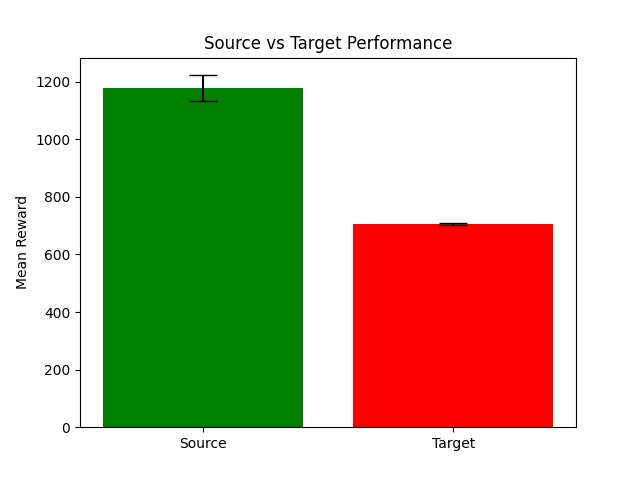

### Question 2.2
If higher performances can be reached by training on the target environment directly, what prevents us from doing so (in a sim-to-real setting)?

#### Answer 2.2:
The answer is due to two main limitations. Firstly, reinforcement learning models learn using a trial and error approach, which can be time-consuming and resource-intensive. Secondly, they require a large amount of data to learn from, which can be difficult to obtain in some cases. Simulation allows for faster and more cost-effective training, as it eliminates the need for physical testing and reduces the time required to collect data.

# 3. Uniform Domain Randomization
Implement Uniform Domain Randomization (UDR) for the link masses of the Hopper robot.
In this setting, UDR refers to manually designing a uniform distribution over the three remaining masses in the source environment (considering that the torso mass is fixed at -1 kg w.r.t. the target one) and performing training with values that vary at each episode (sampled appropriately from the chosen distributions).

The underlying idea is to force the agent to maximize its reward and solve the task for a range of multiple environments at the same time, such that its learned behavior may be robust to dynamics variations.

Note that, since the choice of the distribution is a hyperparameter of the method, the student has to manually try different distributions in order to expect good results on the target environment.


Train a UDR agent on the source environment with the same RL algorithm previously used. Later test the policy obtained on both the source and target environments.


### Question 3.1
 Is UDR able to overcome the unmodelled effect (shift of torso mass) and lead to more robust policies w.r.t. the naive “source→target” configuration in task 2?

#### Answer 3.1:
Yes, the experiment confirms that UDR is effective in mitigating the gap between source and target environments, showing a better capability of generalization in front of the Reality Gap and, in this case, even better performance compared to the source environment. Here are the results using UDR:

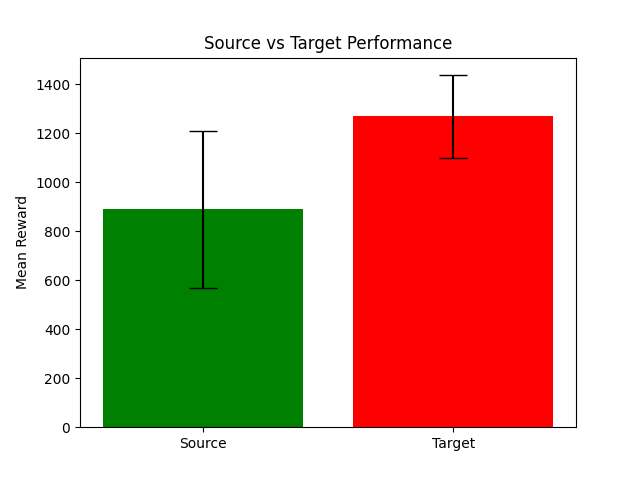

### Question 3.2
Can you think of limitations or downsides of UDR?

#### Answer 3.2:
UDR is not exempt from limitations or downsides: in fact, it is subject to the same limitations as any other transfer learning method. While this method is robust to changes in the environment, it does not represent the optimal solution to the problem. Also, we chose to vary the masses by +- 20% of the original values, which is a rather small variation, but nothing guarantees that this is the best variation to choose and that the model will perform well on environments with different masses with greater variations.

**Hints:**

- env.unwrapped.model.body_mass[i] controls the mass of the i-th body in the Hopper environment. In particular, the torso mass value is env.unwrapped.model.body_mass[1], the thigh mass value is env.unwrapped.model.body_mass[2], and so on.
- To check out all body names: env.unwrapped.model.body(i).name
- Remember not to randomize the torso mass!

# 4 Project extension - FINAL EXAM ASSIGNMENT
At this stage, you are expected to implement your own extension to the project. This phase may include the implementation of any idea of yours to further improve the sim-to-real transfer in our simple scenario—e.g. investigate the individual importance of randomizing the different masses (thigh, leg, foot)—but is not limited to this problem. For example, you are free to carry out a novel analysis on particular aspects of the reinforcement learning pipeline, which are not necessarily obvious—e.g. extend the analysis to more MuJoCo environments, thoroughly analyzing the impact of different network structures/configurations, etc.
There are no particular constraints on the choice of your extension, as long as the idea/analysis is well motivated and technically sound when implemented.

Keep in mind that, rather than requiring you to obtain actual improvements, this step is for you to go beyond the project guidelines and get a feeling of a research-like approach.

Use the provided second code template for this part.


# References

**[1]** “Reinforcement Learning: An introduction (Second Edition)” by Richard S. Sutton and Andrew G. Barto, [PDF](http://incompleteideas.net/book/RLbook2020.pdf)

**[2]** Kober, J., Bagnell, J. A., & Peters, J. (2013). “Reinforcement learning in robotics: A survey”. The International Journal of Robotics Research, [PDF](https://www.ri.cmu.edu/pub_files/2013/7/Kober_IJRR_2013.pdf)

**[3]** Kormushev, P., Calinon, S., & Caldwell, D. G. (2013). “Reinforcement learning in robotics: Applications and real-world challenges”, [PDF](https://kormushev.com/papers/Kormushev_MDPI_2013.pdf)

**[4]** Höfer, S., Bekris, K., Handa, A., Gamboa, J. C., Golemo, F., Mozifian, M., ... & White, M. (2020). “Perspectives on sim2real transfer for robotics: A summary of the R: SS 2020 workshop”, [PDF](https://arxiv.org/pdf/2012.03806.pdf)

**[5]** J. Tobin, R. Fong, A. Ray, J. Schneider, W. Zaremba, and P. Abbeel, “Domain Randomization for Transferring Deep Neural Networks from Simulation to the Real World.” arXiv, Mar. 20, 2017. [PDF](https://arxiv.org/pdf/1703.06907.pdf)

**[6]** Peng, X. B., Andrychowicz, M., Zaremba, W., & Abbeel, P. (2018, May). “Sim-to-real transfer of robotic control with dynamics randomization”, [PDF](https://xbpeng.github.io/projects/SimToReal/2018_SimToReal.pdf)

**[7]** T. Haarnoja, A. Zhou, P. Abbeel, and S. Levine, “Soft Actor-Critic: Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor.”, [PDF](https://arxiv.org/abs/1801.01290)

**[8]** Schulman, J., Wolski, F., Dhariwal, P., Radford, A., & Klimov, O. (2017). “Proximal policy optimization algorithms”, [PDF](https://arxiv.org/pdf/1707.06347.pdf)